# Exercise set 7

>The goal of this exercise is to learn how to perform a
>**principal component analysis (PCA)**. We will here focus
>on how we can plot and inspect the scores and loadings,
>and the variance explained by different principal components (PCs).

## Exercise 7.1

In the exercise, we will investigate if we can
"discover" the periodic table from a data set that
contains information on the first 86 elements (period 1&ndash;6).
The variables present in this data set are described
in Table 1.

|**Column**        | **Description**                                         | **Unit** |
|------------------|---------------------------------------------------------|----------|
|element           | The symbol for the element (e.g. H, He, etc.)           | —        |
|metal             | Classification of the element as a metal (yes) or not (no) | —        |
|mass              | Atomic weight                                           | u        |
|density           | Density of the element                                  | g/cm³    |
|atomic_radius     | Radius of the element                                   | Å        |
|electronegativity | The electronegativity of the element                    | —        |
|first_ionization  | The first ionization energy of the element              |          |
|neutrons          | The number of neutrons in the element                   | —        |
|protons           | The number of protons in the element                    | —        |
|electrons         | The number of electrons in the element                  | —        |
|1s, 2s, 2p, etc.  | The number of electrons in different orbitals           | —        |
|**Table 1:** *Data columns present in the file [Data/periodic_table.csv](./Data/periodic_table.csv)*        |   |

We will use principal component analysis to investigate the data set,
and in this exercise, we will focus on creating plots for
the scores, loadings, and explained variance.

### 7.1(a)
Begin by loading the data, this can be done with:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

%matplotlib inline
# For interactive use: %matplotlib notebook

sns.set_theme(style="ticks", context="notebook", palette="muted")

data = pd.read_csv("Data/periodic_table.csv")
data

C:\Users\joach\AppData\Local\Temp\ipykernel_9120\1405244686.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,element,metal,mass,density,atomic_radius,electronegativity,first_ionization,neutrons,protons,electrons,...,4s,3d,4p,5s,4d,5p,6s,4f,5d,6p
0,H,no,1.007,0.000090,0.79,2.20,13.5984,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,He,no,4.002,0.000179,0.49,4.16,24.5874,2,2,2,...,0,0,0,0,0,0,0,0,0,0
2,Li,yes,6.941,0.534000,2.10,0.98,5.3917,4,3,3,...,0,0,0,0,0,0,0,0,0,0
3,Be,yes,9.012,1.850000,1.40,1.57,9.3227,5,4,4,...,0,0,0,0,0,0,0,0,0,0
4,B,no,10.811,2.340000,1.20,2.04,8.2980,6,5,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Pb,yes,207.200,11.300000,1.80,2.33,7.4167,125,82,82,...,2,10,6,2,10,6,2,14,10,2
82,Bi,yes,208.980,9.810000,1.60,2.02,7.2856,126,83,83,...,2,10,6,2,10,6,2,14,10,3
83,Po,no,210.000,9.320000,1.50,2.00,8.4170,126,84,84,...,2,10,6,2,10,6,2,14,10,4
84,At,no,210.000,7.000000,1.40,2.20,9.3000,125,85,85,...,2,10,6,2,10,6,2,14,10,5


Investigate the correlations between the variables `mass`, `atomic_radius`,
`electronegativity`, `first_ionization`, `neutrons`, `protons`, and `electrons`. Are these variables
correlated as you expect?

In [2]:
# Select the variables to use for correlations
select = [
    "mass",
    "atomic_radius",
    "electronegativity",
    "first_ionization",
    "neutrons",
    "protons",
    "electrons",
]


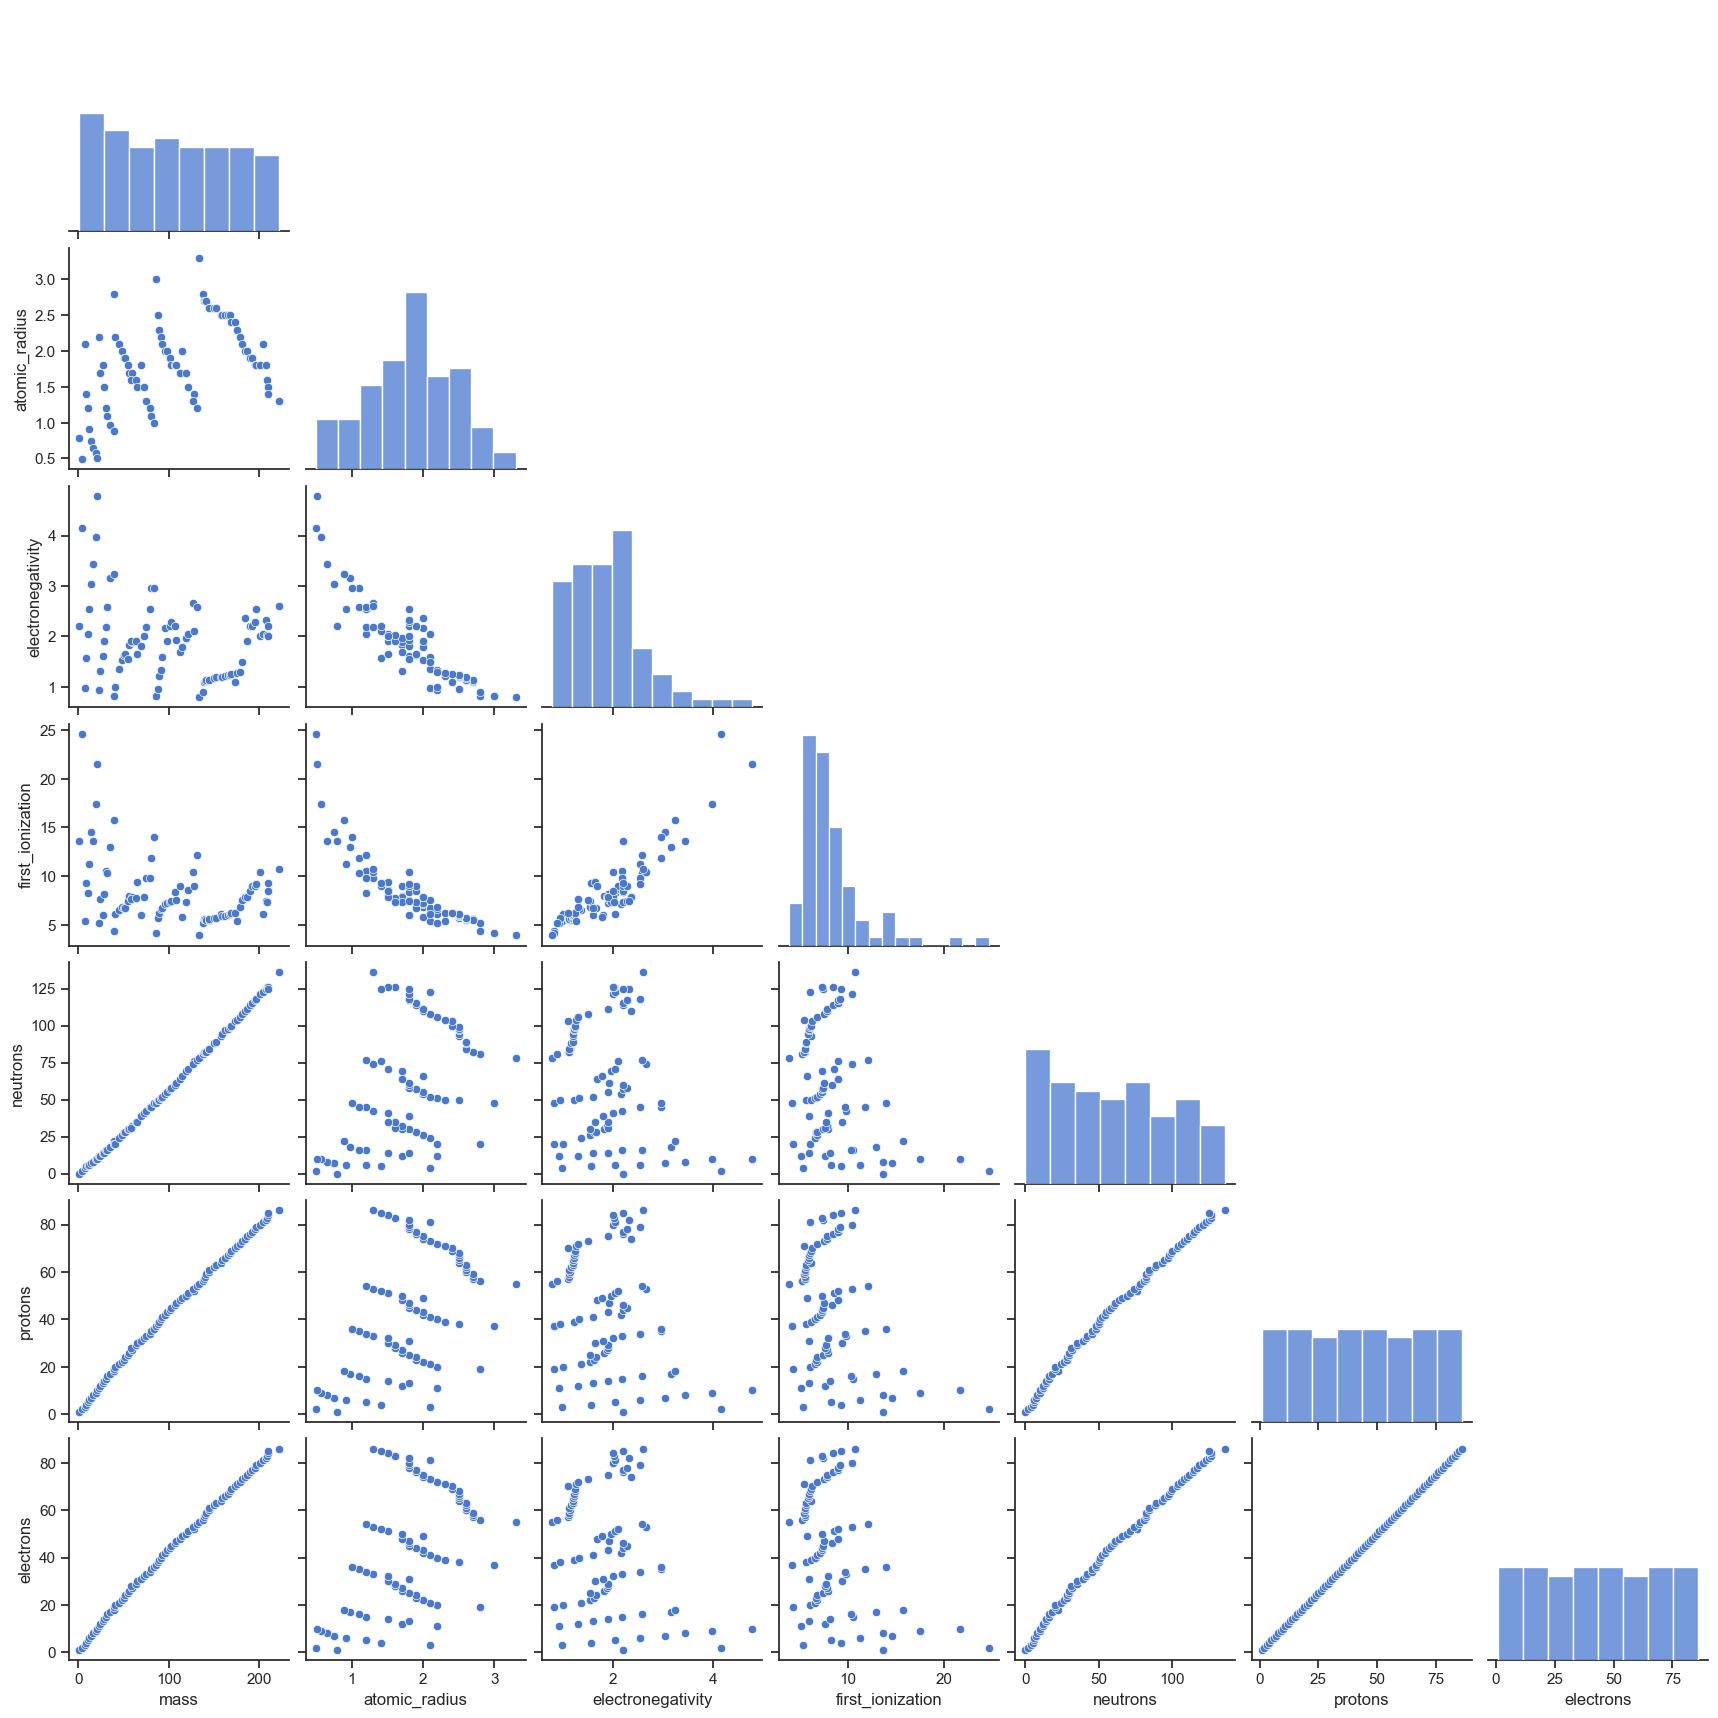

In [3]:
# Your code here. Hint: Use the .corr() method of a pandas.

data[select].corr()

grid = sns.pairplot(data[select],
                    corner = True)

#### Your answer to question 7.1(a):

The correlation between mass:neutrons:protons:electrons is as expected in that increasing amounts of components increase the mass. The same goes for atomic radius.
Pairwise correlation between neutrons:protons:electrons is also as expected as these are almost always balanced.

The rest I could probably also say something about if I weren't sick and unable to think.

### 7.1(b)
Next, run a principal component analysis on the data you just
loaded. This can be done with:

In [4]:
variables = [i for i in data.columns if i not in ("element", "metal")]
elements = data["element"].values
X = data[variables]

X = scale(X)

# Run PCA and obtain the scores:
pca = PCA()
scores = pca.fit_transform(X)
len(elements)


86

Notice here that we do not include the metal classification in the
data we analyze. This is
because we will use this information
later and want to check if this classification is
something the PCA analysis can discover from the other variables.

The last line in the code above
performs the principal component analysis and returns the *scores*.
In your own words, how would you describe scores? Check the
dimensionality of the scores matrix &ndash; is this as expected?

In [5]:
# Your code here
scores.shape
#test

(86, 23)

#### Your answer to question 7.1(b):

With dimensionality you mean a 2D matrix with x rows and y columns, then yes. The number of columns for each variable is the original 25 minus the two we excluded. 
The number of rows correspond to the number of elements we have data for.

### 7.1(c)
Plot the scores for principal component number 1 against the scores
of principal component number 2. This can be done with:

[Text(0, 0.5, 'Scores PC2 (15%)')]

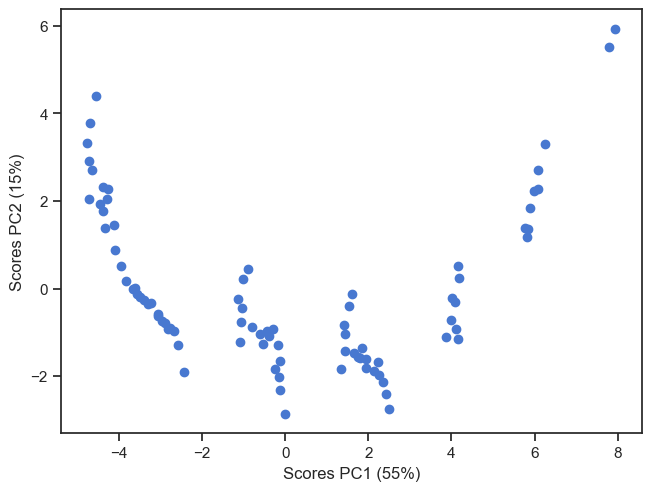

In [6]:
# Plot scores for the two first principal components:
fig, ax = plt.subplots(constrained_layout=True)
ax.scatter(scores[:, 0], scores[:, 1])
ax.set(xlabel=f"Scores PC1 ({pca.explained_variance_ratio_[0]*100:.2g}%)")
ax.set(ylabel=f"Scores PC2 ({pca.explained_variance_ratio_[1]*100:.2g}%)")

Here, you can also
show labels for the elements with the following modification to the code above:

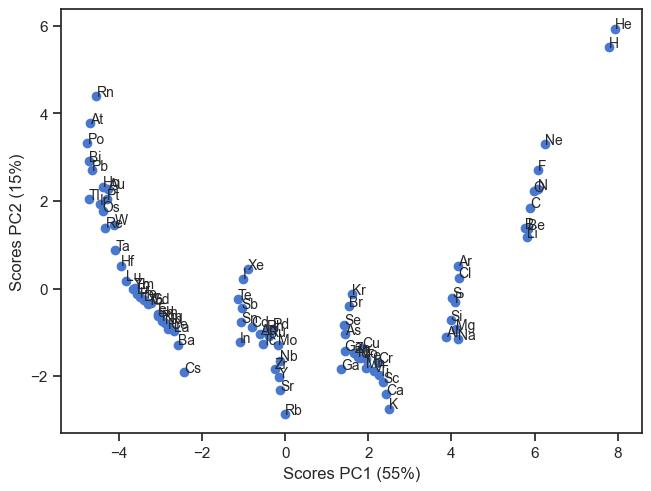

In [7]:
# Plot scores for the two first principal components
# + add element symbols
fig, ax = plt.subplots(constrained_layout=True)
ax.scatter(scores[:, 0], scores[:, 1])
ax.set(xlabel=f"Scores PC1 ({pca.explained_variance_ratio_[0]*100:.2g}%)")
ax.set(ylabel=f"Scores PC2 ({pca.explained_variance_ratio_[1]*100:.2g}%)")

# Add labels for the elements:
for i, symbol in enumerate(elements):
    ax.text(scores[i, 0], scores[i, 1], symbol, fontsize="small")

Do you observe any groupings or trends in the data? How does this compare with the periodic system?

In [8]:
# Your code here
period1 = []
period2 = []

for i, symbol in enumerate(elements):
    if scores[i,0] > 7.5:
        period1.append(symbol)
    
    if 3.5 < scores[i,0] < 4.5:
        period2.append(symbol)
    
    # if scores[i, 0] > 7.5:
    #     print(scores[i, 0], scores[i, 1], symbol)

print(period1)
print(period2)

['H', 'He']
['Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar']


#### Your answer to question 7.1(c):

The scores seems to be grouped according to the periods of the periodic table

### 7.1(d)
Add some color to your scores plot by coloring the elements according to their
classification as metals or not. This can be done by using the `c` argument
of the `ax.scatter` method:

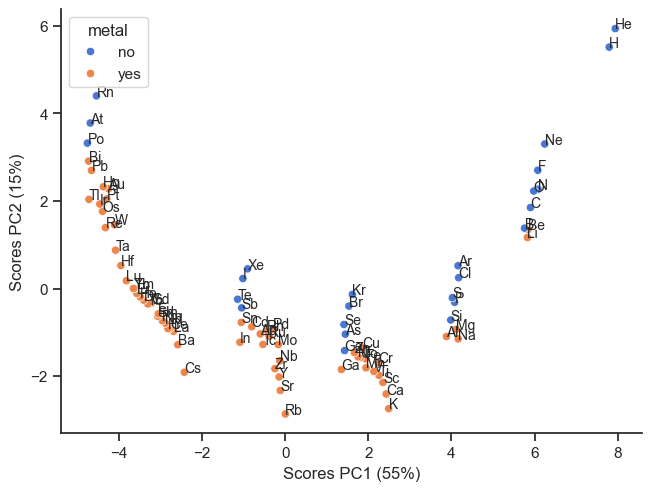

In [9]:
# Plot scores for the two first principal components + add element symbols
fig, ax = plt.subplots(constrained_layout=True)
sns.scatterplot(data=data, x=scores[:, 0], y=scores[:, 1], hue="metal")
ax.set(xlabel=f"Scores PC1 ({pca.explained_variance_ratio_[0]*100:.2g}%)")
ax.set(ylabel=f"Scores PC2 ({pca.explained_variance_ratio_[1]*100:.2g}%)")

# Add labels for the elements:
for i, symbol in enumerate(elements):
    ax.text(scores[i, 0], scores[i, 1], symbol, fontsize="small")
sns.despine(fig=fig)

Do you observe any new groupings/trends in the data after
adding this extra color? Here, you can also experiment with using different
columns for coloring the data, for instance, the number of electrons.

In [10]:
# Your code here

#### Your answer to question 7.1(d):


As we determined in task c the elements are grouped according to the periods, with the higher (starting with 1 and moving downwards) periods located at the higher PC1 scores.
When looking at the metal category of the elements we see an increasing trend of metals lower on the PC1-score axis, which is to be expected as the periods corresponding to these groups has a higher content of metal elements.

From the looks of it we have elements from the first 6 periods, I would exect to see an even higher percentage of metals if we had also included and plotted period 7 based on the periodic table.

### 7.1(e)
Next, we will investigate how much of the variance we explain
with the different principal components.
The variance explained by a particular
component can be accessed by using `pca.explained_variance_ratio_`.
Below, you can find some code that will plot
the explained variance per component in a bar plot:

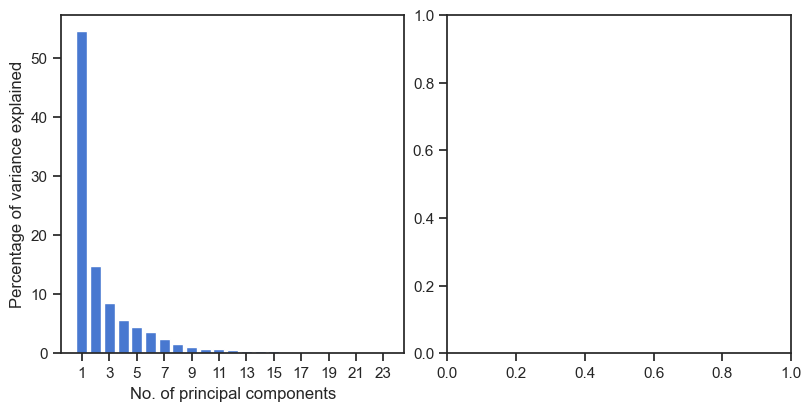

In [11]:
# Plot the explained variance:
fig, (ax1, ax2) = plt.subplots(
    constrained_layout=True, ncols=2, figsize=(8, 4)
)
variance = pca.explained_variance_ratio_ * 100
components = 1 + np.arange(len(variance))
ax1.bar(components, variance)
ax1.set_xticks(components[::2])
ax1.set(
    xlabel="No. of principal components",
    ylabel="Percentage of variance explained",
);

Add a line plot to the second axis, `ax2`, in the plot above that
shows the total variance explained by $x$ components. That is, the $x$-axis should
show the number of components used, and the $y$-axis should show the summed explained variance
when using $x$ components. For calculating the summed explained variance, you can
use the cumulative sum which can be obtained by `np.cumsum(pca.explained_variance_ratio_)`.

Based on the plot you just created for the explained variance,
how many principal components are needed
to explain at least 90\% of the variance?

In [ ]:
# Your code here

#### Your answer to question 7.1(e): How many components are needed to explain at least 90% of the variance?
*Double click here*

### 7.1(f)
Next, we will investigate the loadings. In your own words, how would you
explain what the loadings are?

In [ ]:
# Your code here

#### Your answer to question 7.1(f):
*Double click here*

### 7.1(g)
Let $\mathbf{p}_1$ and $\mathbf{p}_2$ be the
vectors with loadings for the first and second principal components from the analysis you have
just carried out. Verify that the vectors are normalized (e.g., $\mathbf{p}_1 \cdot \mathbf{p}_1 = 1$) and
that they are orthogonal to each other (i.e., $\mathbf{p}_1 \cdot \mathbf{p}_2 = 0$).

The loadings can be accessed with:

In [ ]:
# Get the loadings for PC1 and PC2:
loadings = pca.components_.T
pc1 = loadings[:, 0]
pc2 = loadings[:, 1]

**Hint:** You can use `np.dot` to take the dot product.

In [ ]:
# Your code here

#### Your answer to question 7.1(g):
*Double click here*

### 7.1(h)
For a particular loadings vector, the $i$'th component contains the
contribution from the original variable $i$ to the principal
component described by this loadings vector. This contribution
is a number between $-1$ and $1$.

We can get an overview of the contributions to
principal component number 1 and 2 by plotting the loadings in a bar plot as follows:

In [ ]:
fig, (ax1, ax2) = plt.subplots(
    constrained_layout=True, nrows=2, sharex=True, sharey=True
)
position = np.arange(len(pc1))
ax1.bar(position, pc1)
ax1.set_xticks(position)
ax1.set_xticklabels(variables, rotation=90)
ax1.axhline(y=0, ls=":", color="k")  # Horizontal line to show 0
ax2.bar(position, pc2)
ax2.set_xticks(position)
ax2.set_xticklabels(variables, rotation=90)
ax2.axhline(y=0, ls=":", color="k")  # Horizontal line to show 0
ax1.set_title("PC1", loc="left")
ax2.set_title("PC2", loc="left")
sns.despine(fig=fig)

Make a bar plot for the two first principal components and inspect
the contributions from the different variables. The plots
should indicate that the variables neutrons, protons, and electrons contribute
almost equally to both the first and second
principal components. Can you provide an interpretation of this
observation?

In [ ]:
# Your code here

#### Your answer to question 7.1(h):
*Double click here*

### 7.1(i)
The loadings plot is usually easier to interpret than the plot we just made.
Here, we will make the loadings plot
for principal component 1 and principal component 2.
The current case we are investigating is a bit complex since we have many
variables. We will show the loadings by drawing arrows.

In [ ]:
fig, ax = plt.subplots(constrained_layout=True)
ax.set(xlabel=f"Loadings PC1 ({pca.explained_variance_ratio_[0]*100:.2g}%)")
ax.set(ylabel=f"Loadings PC2 ({pca.explained_variance_ratio_[1]*100:.2g}%)")
# Make the scale for the x- and y-axis the same:
ax.set_xlim(-0.4, 0.4)
ax.set_ylim(ax.get_xlim())
ax.set_aspect("equal")
# Add x=0 and y=0 lines to help location positive and negative values:
ax.axhline(y=0, ls=":", color="k")
ax.axvline(x=0, ls=":", color="k")
# Add the arrows:
for i, vari in enumerate(variables):
    x, y = pc1[i], pc2[i]
    ax.text(x, y, vari, fontsize="x-small")
    # Draw arrow from the origin to the point:
    ax.annotate(
        "",
        xy=(x, y),
        xytext=(0, 0),
        arrowprops=dict(
            arrowstyle="-|>", lw=2, color="red", mutation_scale=25
        ),
    )

One way to make this plot easier to read is to remove the text and use different colors for the arrows.
We can select different colors using the [color_palette](https://seaborn.pydata.org/generated/seaborn.color_palette.html) method from seaborn:

In [ ]:
sns.color_palette("husl", as_cmap=True)

In [ ]:
sns.color_palette("flare", as_cmap=True)

In [ ]:
sns.color_palette("pastel")

Select a color map you like and generate some colors with:

In [ ]:
colors = sns.color_palette("husl", len(variables))
# We use len(variables) to get one color per variable

We can use the colors as follows:

In [ ]:
fig, ax = plt.subplots(constrained_layout=True)
ax.set(xlabel=f"Loadings PC1 ({pca.explained_variance_ratio_[0]*100:.2g}%)")
ax.set(ylabel=f"Loadings PC2 ({pca.explained_variance_ratio_[1]*100:.2g}%)")
# Make the scale for the x- and y-axis the same:
ax.set_xlim(-0.4, 0.4)
ax.set_ylim(ax.get_xlim())
ax.set_aspect("equal")
# Add x=0 and y=0 lines to help location positive and negative values:
ax.axhline(y=0, ls=":", color="k")
ax.axvline(x=0, ls=":", color="k")
# Add the arrows:
arrows = []
for i, vari in enumerate(variables):
    x, y = pc1[i], pc2[i]
    # Draw arrow from the origin to the point:
    arrow = ax.annotate(
        "",
        xy=(x, y),
        xytext=(0, 0),
        arrowprops=dict(
            arrowstyle="-|>", lw=2, color=colors[i], mutation_scale=25
        ),
        label=vari,
    )
    arrows.append(arrow)

ax.legend(
    [i.arrow_patch for i in arrows],
    [i.get_label() for i in arrows],
    fontsize="xx-small",
)


After you have made the loadings plot, locate the
electronegativity and the atomic radius. Are these located (relative
to each other) as you would expect? How about the electrons and protons?

In [ ]:
# Your code here

#### Your answer to question 7.1(i):
*Double click here*

### 7.1(j)
Interpreting the scores and loadings together can be instructive. Create a new figure where you show the scores and loadings next to each other. You can create such a figure with:

In [ ]:
fig, (ax1, ax2) = plt.subplots(
    constrained_layout=True, ncols=2, figsize=(8, 4)
)
ax1.text(0.5, 0.5, "Plot the scores in ax1", ha="center")
ax2.text(0.5, 0.5, "Plot the loadings in ax2", ha="center")

After you have completed the plot above:

1. Does the direction of increasing mass correspond to what you would expect?

2. In this case, it is not so easy to interpret the loadings since we have many variables,
   and many seem to be equally important. But, if you were to give a simplified description of
   the two principal components, how would you describe them, and does this fit with your
   understanding of the periodic system?

In [ ]:
# Your code here

#### Your answer to question 7.1(j):
*Double click here*

# Extra: Interactive plots with [bokeh](https://docs.bokeh.org/en/latest/)

Some of the plots we have made here are a bit crowded, and it can be difficult to make out the labels. One solution is to add some interactivity; for instance, we can display the name of the variables in the loadings plot when we hoover the mouse of the symbol. This is not so easy with matplotlib, but it is relatively easy with 
[bokeh](https://docs.bokeh.org/en/latest/). Below is some code to make more interactive versions of the scores and loadings plot. It is included here as an "extra" part since we have to use a new Python library that requires some extra coding. The method defined below might be overly complex;
the [bokeh gallery](https://docs.bokeh.org/en/latest/docs/gallery.html)
has more to-the-point examples.

In [ ]:
# Imports for bokeh:
from bokeh.io import output_notebook
from bokeh.models import (
    ColorBar,
    ColumnDataSource,
    HoverTool,
    LabelSet,
)
from bokeh.plotting import figure, show
from bokeh.transform import linear_cmap

In [ ]:
# Set ut outot for Jupyter notebook:
output_notebook()

In [ ]:
def bokeh_2d_scatter(
    x_data,
    y_data,
    names,
    title="Scatter plot",
    xlabel="x",
    ylabel="y",
    color_by=None,
    color_by_feature_name="Color feature",
    add_labels=False,
):
    """Create a 2D scatter plot with bokeh.

    Parameters
    ----------
    x_data : object like numpy.array
        The x-coordinates for the scatter plot.
    y_data : object like numpy.array
        The y-coordinates for the scatter plot.
    names : list of strings
        The name of the items in the scatter plot.
    title : string, optional
        Title of the plot.
    xlabel : string, optional
        Label for the x-axis.
    ylabel : string, optional
        Label for the y-axis.
    color_by : object like numpy.array, optional
        Numbers to color the items in the scatter plot by.
        These numbers will be used to set up a color map.
    color_by_feature_name : string, optional
        Name of the feature the color in `color_by` represents.
    add_labels : boolean, optional
        If True, also write the names above the symbols.
    """
    plot_data = {
        "x": x_data,
        "y": y_data,
        "name": names,
    }

    tool_html = [
        '<div><span style="font-weight: bold;">@name</span></div>',
    ]

    color_mapper = None
    extra_kw = {}

    if color_by is not None:
        plot_data["color_by"] = color_by
        tool_html.append(f"<div>{color_by_feature_name}: @color_by</div>")
        color_mapper = linear_cmap(
            field_name="color_by",
            palette="Viridis256",
            low=min(color_by),
            high=max(color_by),
        )
        extra_kw = {"color": color_mapper, "marker": "circle"}

    tool_html = "<div>" + "\n".join(tool_html) + "</div>"
    source = ColumnDataSource(data=plot_data)

    fig = figure(
        title=title,
        active_scroll="wheel_zoom",
        background_fill_color="#fafafa",
    )
    fig.scatter(
        x="x",
        y="y",
        size=12,
        fill_alpha=0.6,
        name="points",
        source=source,
        **extra_kw,
    )

    hover = HoverTool(
        name="points",
        tooltips=tool_html,
    )
    fig.add_tools(hover)
    fig.xaxis.axis_label = xlabel
    fig.yaxis.axis_label = ylabel

    if color_by is not None:
        color_bar = ColorBar(
            color_mapper=color_mapper["transform"],
            width=10,
            title=color_by_feature_name,
        )
        fig.add_layout(color_bar, "right")
    if add_labels:
        labels = LabelSet(
            x="x",
            y="y",
            text="name",
            y_offset=8,
            text_font_size="11px",
            text_color="#555555",
            source=source,
            text_align="center",
        )
        fig.add_layout(labels)
    return fig

In [ ]:
fig = bokeh_2d_scatter(
    scores[:, 0],
    scores[:, 1],
    data["element"].values,
    title="Plot of scores",
    xlabel="PC1",
    ylabel="PC2",
    color_by=data["atomic_radius"].to_numpy(),
    color_by_feature_name="Atomic radius",
    add_labels=True,
)
show(fig)

In [ ]:
fig = bokeh_2d_scatter(
    pc1,
    pc2,
    variables,
    title="Plot of loadings",
    xlabel="PC1",
    ylabel="PC2",
    add_labels=True,
)
show(fig)